# 1 enviroment & data

In this session, you will discover how to solve the problem of PATTERN RECOGNITION for data ABSENTEEISM_AT_WORK with STATISTICS &VISULAIZATION techniques 

Import libraries

In [1]:
import scipy
import numpy as np
import matplotlib
import pandas as pd

In [2]:
import os
import math
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #matplotlib is a library, pyplot is a module
import mpl_toolkits #mpl_toolkits is a package
from mpl_toolkits.mplot3d import axes3d #axe3d is a module

DATA

In [3]:
input_file = "absenteeism.csv"

The data are composed of the followin attributes:

Individual identification (ID)
Reason for absence ( by the categories of the International Code of Diseases (ICD))
Other (non ICD) categories (e.g. Month of absence, and Age) For further details see "Attribute absenteeism.doc"

In [4]:
def get_df(file):
    dataset = pd.read_csv(file)
    df = pd.DataFrame(dataset)
    df=df.fillna(0)
    return df
df=get_df(input_file)

In [5]:
def plot_properties(dataframe):
    print('columns\n',dataframe.columns)
    print('shape\n',dataframe.shape)
    print('head\n',dataframe.head(5))
plot_properties(df)

columns
 Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
shape
 (740, 21)
head
    ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289  

# 2 basic statistics (How spread out are the data?)

In [6]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Box and Whisker
The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

Box and Whisker for selected columns
 Axes(0.125,0.11;0.775x0.77)


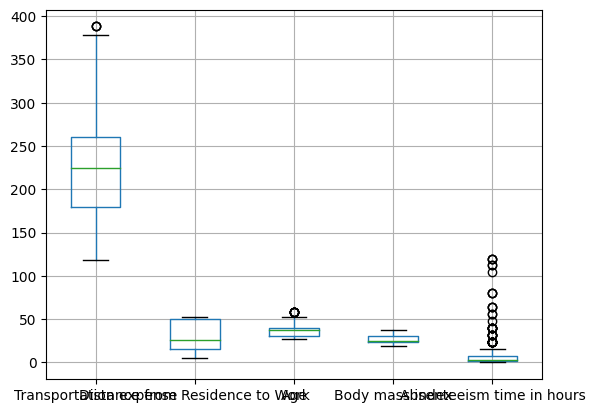

In [7]:
def plot_statistics(dataframe,selected_columns):
    print('Box and Whisker for selected columns\n',dataframe.boxplot(column=selected_columns) ) 
plot_statistics(df,['Transportation expense', 'Distance from Residence to Work', 'Age', 'Body mass index', 'Absenteeism time in hours'])

# 3 histograms ( Are the data skewed?)

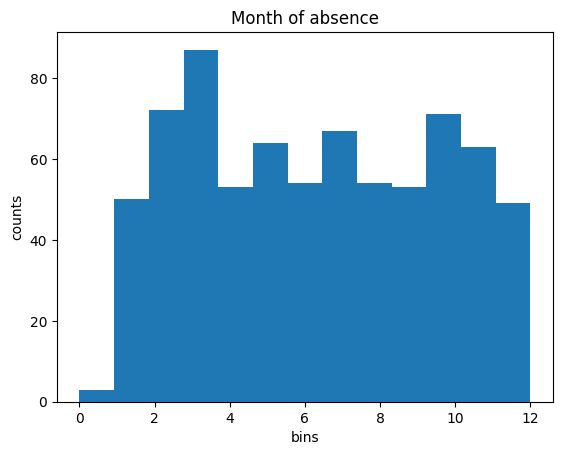

In [8]:
def plot_histogram(dataframe,col):
        n_unique_categories = len(pd.unique(dataframe[col]))
        plt.hist(dataframe[col], bins=n_unique_categories)
        plt.xlabel("bins")
        plt.ylabel("counts")
        plt.title(col)
        plt.show()
plot_histogram(df,'Month of absence')

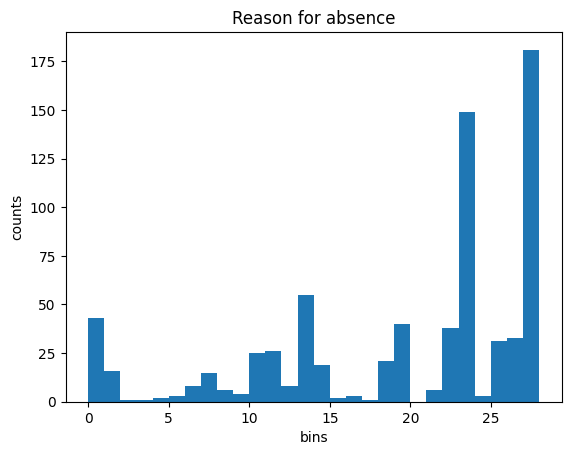

In [9]:
plot_histogram(df,'Reason for absence')

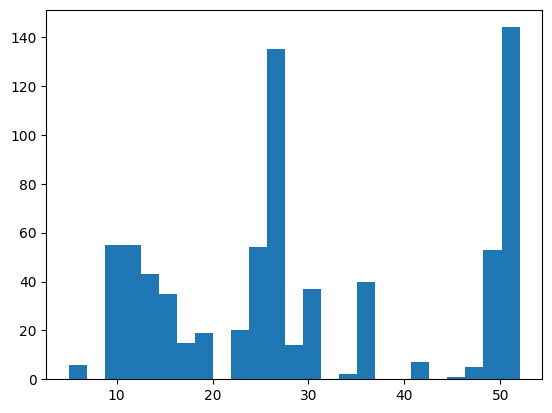

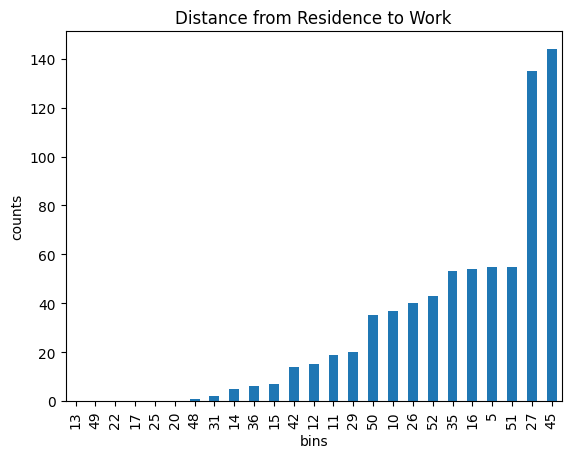

In [10]:
def plot_sorted_histogram(dataframe,col):
    n_unique_categories = len(pd.unique(df[col]))
    category_hist = plt.hist( df[col], bins=n_unique_categories)
    category_hist_counts= category_hist[0] #category_hist_bins = category_hist[1]
    df1 = pd.DataFrame({'categories': pd.unique(df[col]),
                   'number': category_hist_counts})
    df1.set_index('categories', inplace=True)
    df1.sort_values('number', inplace=True)
    df1.plot(y='number', kind='bar', legend=False)
    plt.xlabel("bins")
    plt.ylabel("counts")
    plt.title(col)
    plt.show()
plot_sorted_histogram(df,'Distance from Residence to Work')

   Seasons  Absenteeism time in hours
0        1                   7.300000
1        2                   6.000000
2        3                   8.153005
3        4                   6.353846


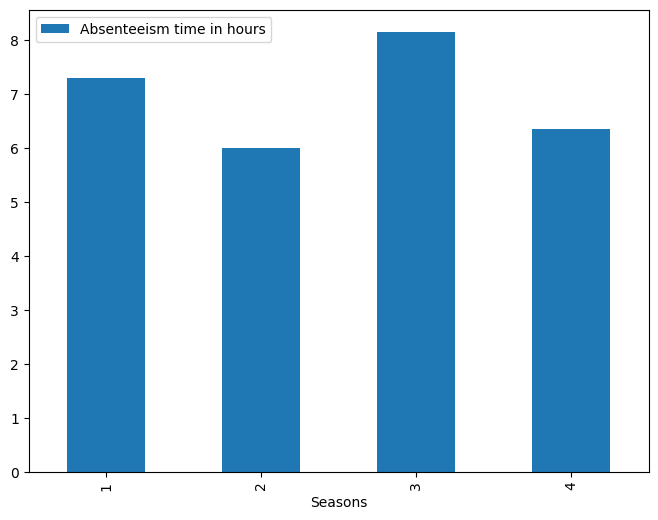

In [11]:
def plot_mean_groupedbycol (dataframe,col,grouping_col):
    grouping_set = set(df[grouping_col])
    grouping_list = list(grouping_set)
    mean_grouped = df.groupby(grouping_col)[col].mean()
    mean_list=mean_grouped.tolist()
    groupmean_df = pd.DataFrame({grouping_col:grouping_list,col:mean_list})
    print(groupmean_df)
    ax = groupmean_df.plot.bar(x=grouping_col,y=col, figsize=(8,6))
    plt.show()
plot_mean_groupedbycol(df,"Absenteeism time in hours","Seasons")

    Reason for absence  Absenteeism time in hours
0                    0                   0.000000
1                    1                  11.375000
2                    2                  24.000000
3                    3                   8.000000
4                    4                   4.500000
5                    5                   6.333333
6                    6                  21.375000
7                    7                  10.000000
8                    8                   5.333333
9                    9                  42.000000
10                  10                  11.040000
11                  11                  11.423077
12                  12                  23.375000
13                  13                  15.309091
14                  14                   8.789474
15                  15                   8.000000
16                  16                   2.000000
17                  17                   8.000000
18                  18                  10.333333


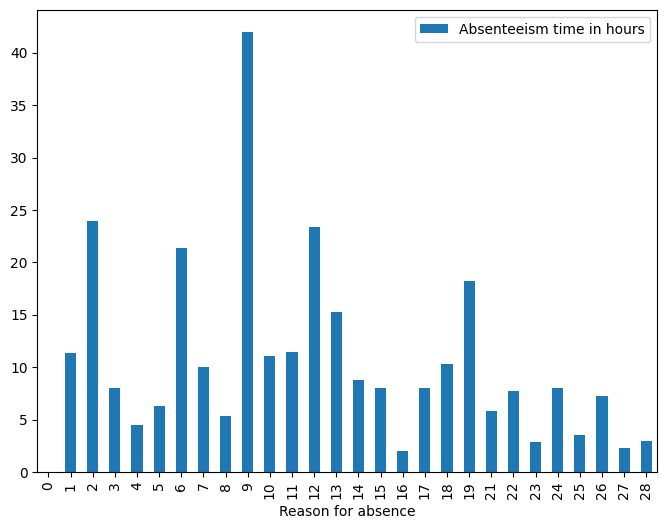

In [12]:
plot_mean_groupedbycol(df,"Absenteeism time in hours","Reason for absence")

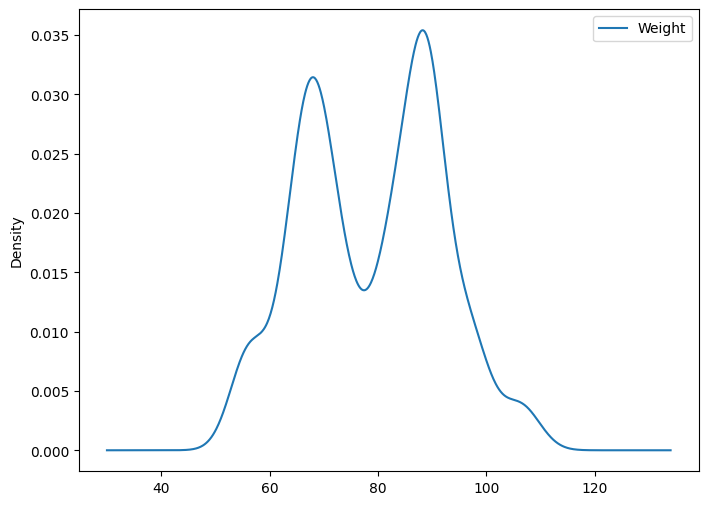

In [13]:
def plot_distribution(dataframe,col):
    df.plot.kde(y=col,figsize =(8,6))
    plt.show()
plot_distribution(df,'Weight')

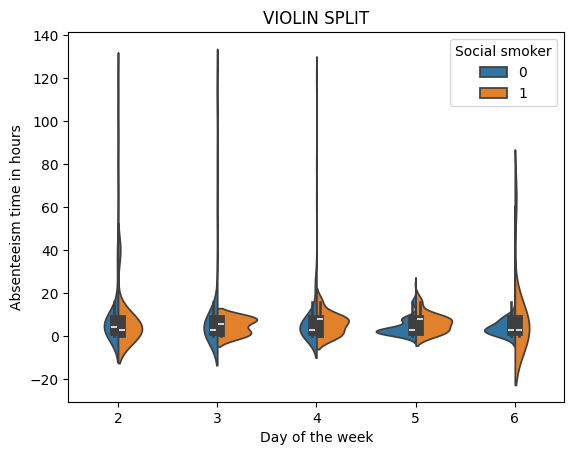

In [14]:
def plot_violin(dataframe,colx,coly,colsplit):
    fig, ax = plt.subplots() 
    ax.set_title('VIOLIN SPLIT')
    sns.violinplot(data=dataframe,x=colx,y=coly,hue=colsplit, split='True')
    plt.show()
plot_violin(df,'Day of the week','Absenteeism time in hours','Social smoker')

# 4 line charts (Are there any outliers? any shifts in values? in variation?)  

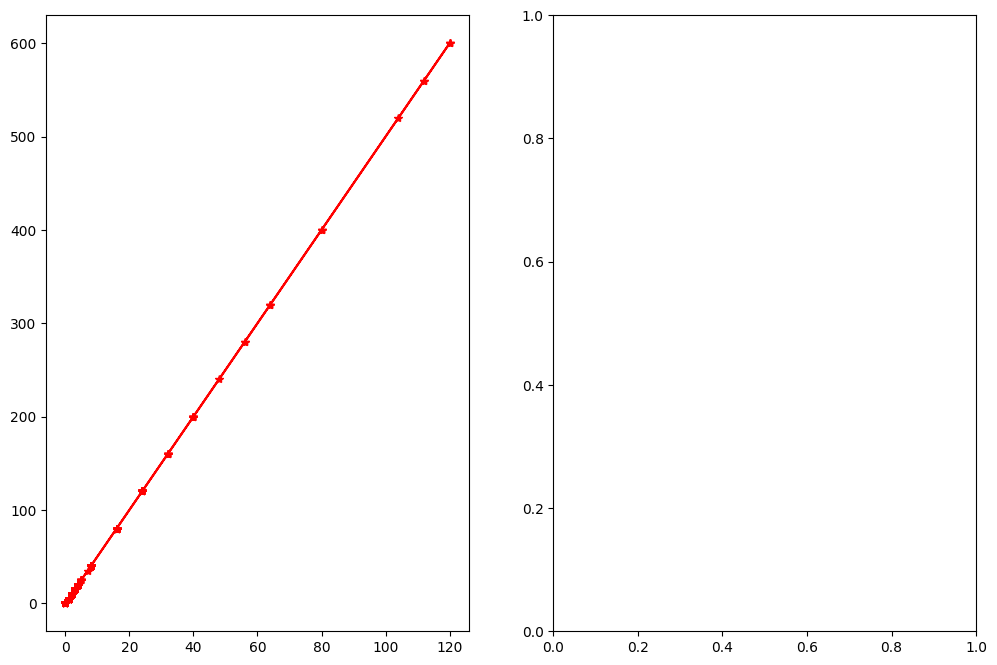

In [15]:
def plot_lines(dataframe,colx1,cost1):
    x_vals = dataframe[colx1]
    y1_vals = [cost1*i for i in x_vals]  
    
    plt.rcParams["figure.figsize"] = [12,8] #rcParams is a function, figure is a group
    plt.subplot(1,2,1)
    plt.plot(x_vals,y1_vals,'r*-', label ="linear") #label is a parameter,Line2D property
    plt.subplot(1,2,2)
    plt.show()
   
plot_lines(df,'Absenteeism time in hours',5)

# 5 scatterplots (Are there any outliers? Bivariate relations?)

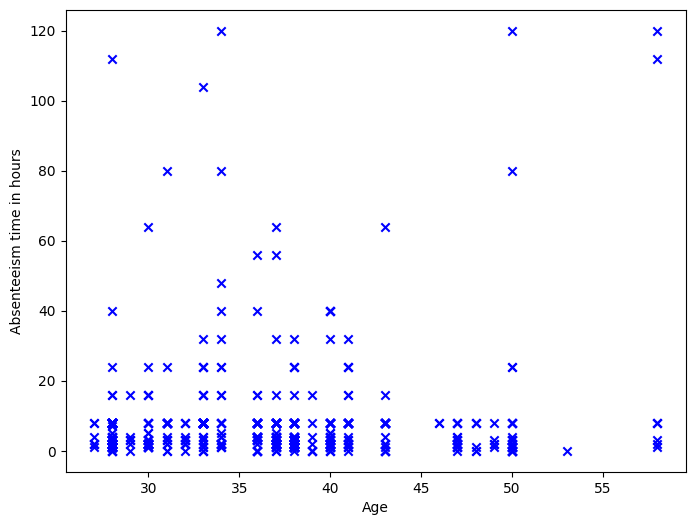

In [16]:
def plot_scatter(dataframe,col1,col2):
        plt.rcParams["figure.figsize"] = [8,6] #rcParams is a function, figure is a group
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.scatter(dataframe[col1], dataframe[col2],c="b", marker ="x")
        plt.show()
plot_scatter(df,'Age', 'Absenteeism time in hours')

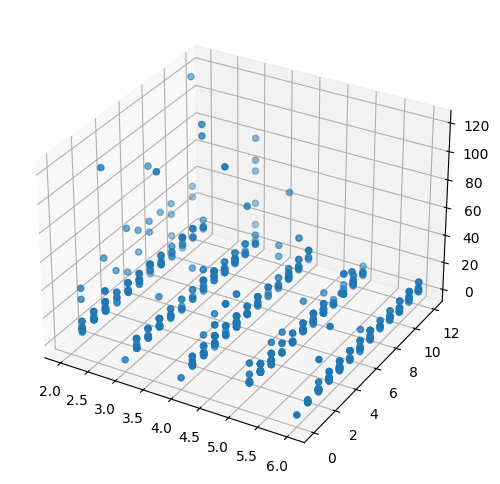

In [17]:
def plot_scatter3d(dataframe,col1,col2,col3):
    figure1= plt.figure()
    axis1=figure1.add_subplot(projection='3d')
    axis1.scatter(df[col1], df[col2], df[col3])
    plt.show()
plot_scatter3d(df,'Day of the week','Month of absence','Absenteeism time in hours')

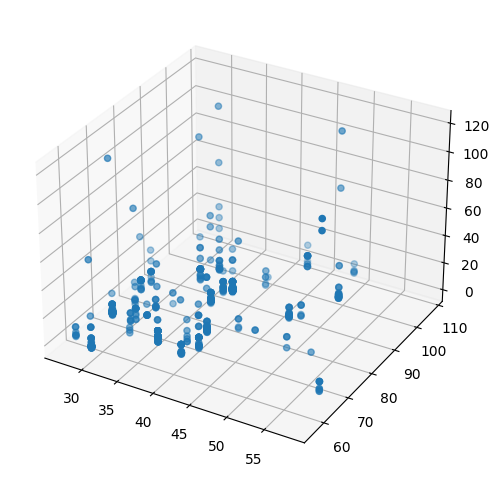

In [18]:
def plot_scatter3d(dataframe,col1,col2,col3):
    figure1= plt.figure()
    axis1=figure1.add_subplot(projection='3d')
    axis1.scatter(df[col1], df[col2], df[col3])
    plt.show()
plot_scatter3d(df,'Age','Weight','Absenteeism time in hours')

# 6 simple linear model

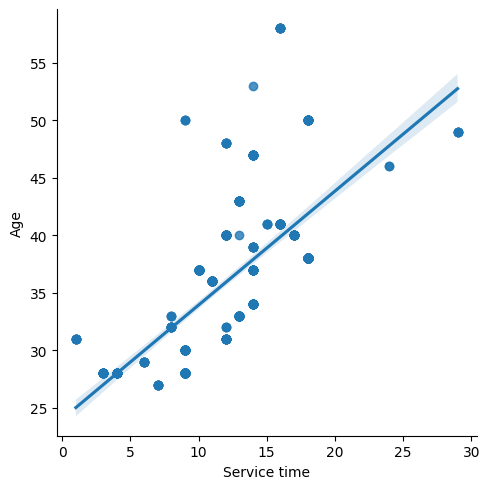

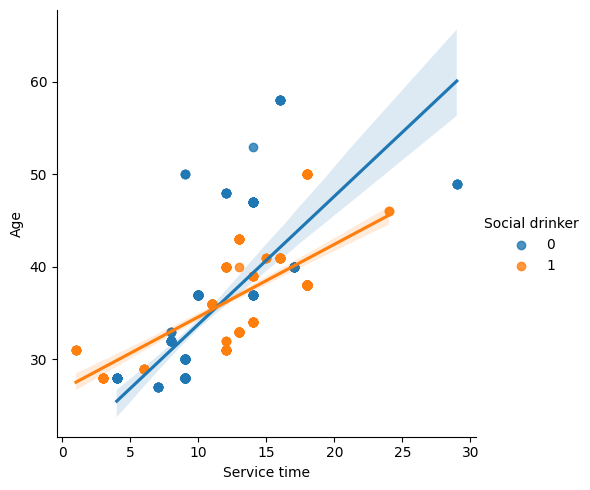

In [19]:
def plot_lm(df,colx,coly,colsplit):
    ax2=sns.lmplot(data=df,x='Service time',y='Age') #lmplot linear model fit
    ax2=sns.lmplot(data=df,x=colx,y=coly, hue=colsplit) #lmplot linear model fit
    plt.show()
plot_lm(df,'Service time','Age','Social drinker')

# 7 correlations

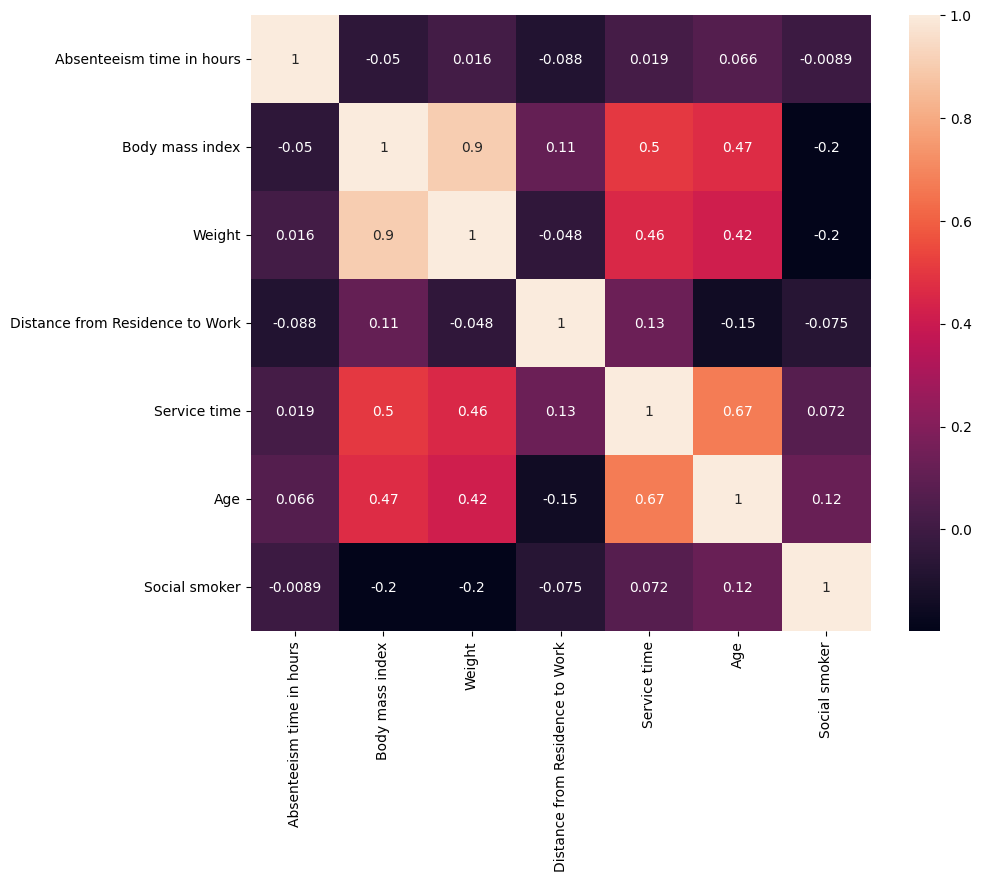

In [20]:
def plot_heatmap(dataframe,cols):
    plt.rcParams["figure.figsize"]=[10,8]
    sub_items = df[cols]
    sub_items_corr = sub_items.corr()
    ax=sns.heatmap(sub_items_corr,annot=True)
    plt.show()
plot_heatmap(df,['Absenteeism time in hours', 'Body mass index','Weight','Distance from Residence to Work','Service time','Age','Social smoker'])